In [2]:
import xarray as xr
import netCDF4 as nc

data = 'wrfout_d03/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data)

FileNotFoundError: [Errno 2] No such file or directory: 'wrfout_d03/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'

In [61]:
# Print the file's metadata (variables, dimensions, attributes)
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE:  OUTPUT FROM WRF V4.2.2 MODEL
    START_DATE: 2022-09-26_00:00:00
    SIMULATION_START_DATE: 2022-09-26_00:00:00
    WEST-EAST_GRID_DIMENSION: 670
    SOUTH-NORTH_GRID_DIMENSION: 718
    BOTTOM-TOP_GRID_DIMENSION: 34
    DX: 1000.0
    DY: 1000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 0
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 6
    RA_LW_PHYSICS: 1
    RA_SW_PHYSICS: 1
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 1
    BL_PBL_PHYSICS: 11
    CU_PHYSICS: 14
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 1
    SST_UPDATE: 1
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGF

In [53]:
# List all variables in the file
print("Variables in the file:", list(dataset.variables.keys()))

# Access a specific variable (e.g., 'temperature')
# Replace 'temperature' with the actual variable name in your file
# variable_data = dataset.variables['temperature'][:]
# print("Temperature data:", variable_data)

# Access dimensions (e.g., latitude, longitude, time)
for dim in dataset.dimensions:
    print(f"Dimension {dim}: {len(dataset.dimensions[dim])}")

# Access global attributes (if any)
print("Global attributes:", dataset.ncattrs())

# Close the file
dataset.close()

Variables in the file: ['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'TKE', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'AREA2D', 'DX2D', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'HWAVE', 'LWAVEP', 'PWAVE', 'WHITECAP', 'SSTSK', 'COSZEN', 'LAI', 'QSHEAR', 'QBUOY', 'QDISS', 'VAR', 'TKE_PBL', 'EL_PBL', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SI

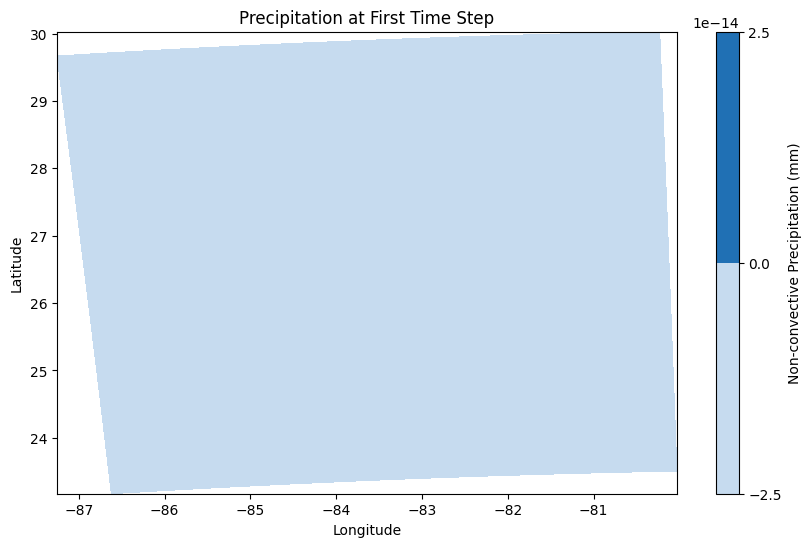

In [54]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

dataset = nc.Dataset(data, 'r')

# Read precipitation and coordinates
rainnc = dataset.variables['RAINNC'][:]  # Non-convective precipitation (mm)
xlat = dataset.variables['XLAT'][0, :, :]  # Latitude (2D)
xlong = dataset.variables['XLONG'][0, :, :]  # Longitude (2D)

# Plot precipitation for the first time step
plt.figure(figsize=(10, 6))
plt.contourf(xlong, xlat, rainnc[0, :, :], cmap='Blues')
plt.colorbar(label='Non-convective Precipitation (mm)')
plt.title('Precipitation at First Time Step')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

dataset.close()

Timestamps: ['2022-09-26_00:00:00', '2022-09-26_01:00:00', '2022-09-26_02:00:00', '2022-09-26_03:00:00', '2022-09-26_04:00:00']


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

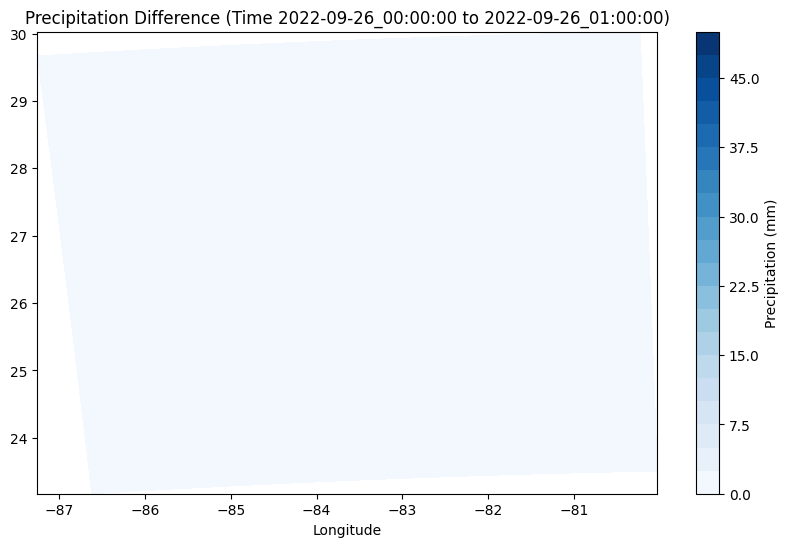

In [55]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

# Open the NetCDF file
dataset = nc.Dataset(data, 'r')

# Read precipitation and coordinates
rainnc = dataset.variables['RAINNC'][:]  # Shape: (Time, south_north, west_east)
rainc = dataset.variables['RAINC'][:]   # Convective precipitation
xlat = dataset.variables['XLAT'][0, :, :]  # Latitude
xlong = dataset.variables['XLONG'][0, :, :]  # Longitude
times = dataset.variables['Times'][:]  # Timestamps

# Convert Times to readable format
times_str = [''.join(time.astype(str)) for time in times]
print("Timestamps:", times_str[:5])  # Print first 5 time steps to check

# Compute precipitation difference (e.g., between first two time steps)
# Total precipitation = (RAINNC[1] - RAINNC[0]) + (RAINC[1] - RAINC[0])
precip_diff = (rainnc[1, :, :] - rainnc[0, :, :]) + (rainc[1, :, :] - rainc[0, :, :])

# Plot the precipitation difference
plt.figure(figsize=(10, 6))
contour = plt.contourf(xlong, xlat, precip_diff, cmap='Blues', levels=np.linspace(0, 50, 21))  # Focus on positive values, adjust max (e.g., 50 mm)
plt.colorbar(contour, label='Precipitation (mm)')
plt.title(f'Precipitation Difference (Time {times_str[0]} to {times_str[1]})')
plt.xlabel('Longitude')
plt.ylabel

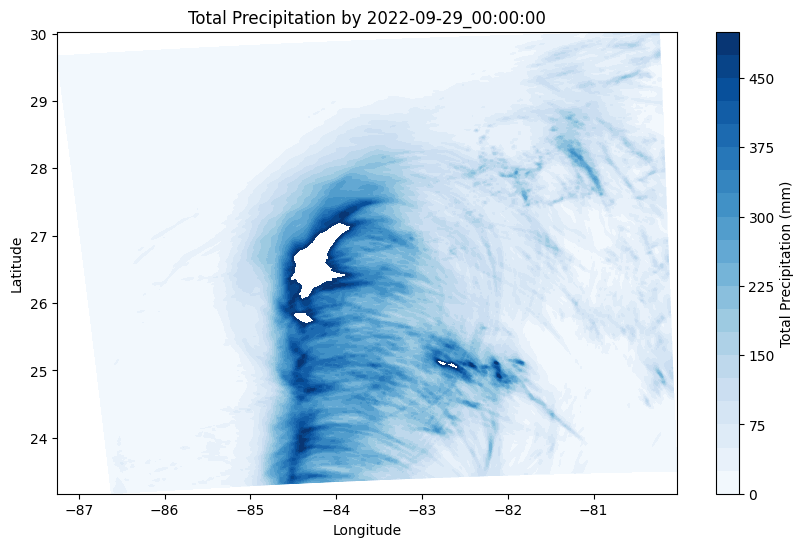

In [56]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

dataset = nc.Dataset(data, 'r')

rainnc = dataset.variables['RAINNC'][:]
rainc = dataset.variables['RAINC'][:]
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

# Total precipitation at the last time step
total_precip = rainnc[-1, :, :] + rainc[-1, :, :]

plt.figure(figsize=(10, 6))
contour = plt.contourf(xlong, xlat, total_precip, cmap='Blues', levels=np.linspace(0, 500, 21))
plt.colorbar(contour, label='Total Precipitation (mm)')
plt.title(f'Total Precipitation by {times_str[-1]}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

dataset.close()

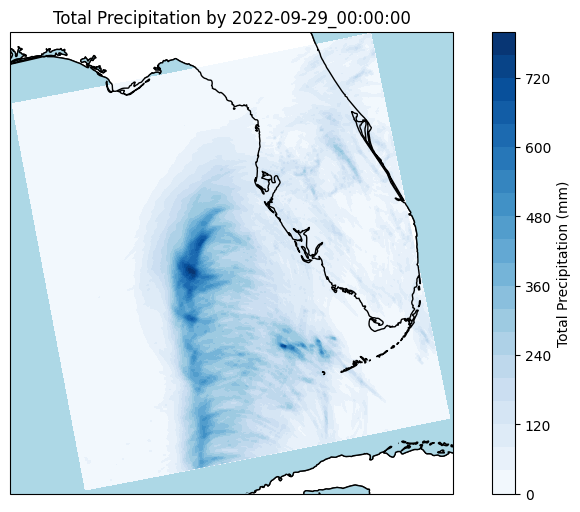

In [57]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the NetCDF file
dataset = nc.Dataset(data, 'r')

# Read precipitation and coordinates
rainnc = dataset.variables['RAINNC'][:]
rainc = dataset.variables['RAINC'][:]
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

# Total precipitation at the last time step
total_precip = rainnc[-1, :, :] + rainc[-1, :, :]

# Create a figure with Cartopy projection (Lambert Conformal, typical for WRF)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())

# Plot the total precipitation with increased vmax
contour = ax.contourf(xlong, xlat, total_precip, transform=ccrs.PlateCarree(),
                      cmap='Blues', levels=np.linspace(0, 800, 21))  # Increased vmax to 600 mm

# Add coastline and land features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add colorbar
plt.colorbar(contour, label='Total Precipitation (mm)')
plt.title(f'Total Precipitation by {times_str[-1]}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

# Close the file
dataset.close()

KeyboardInterrupt: 

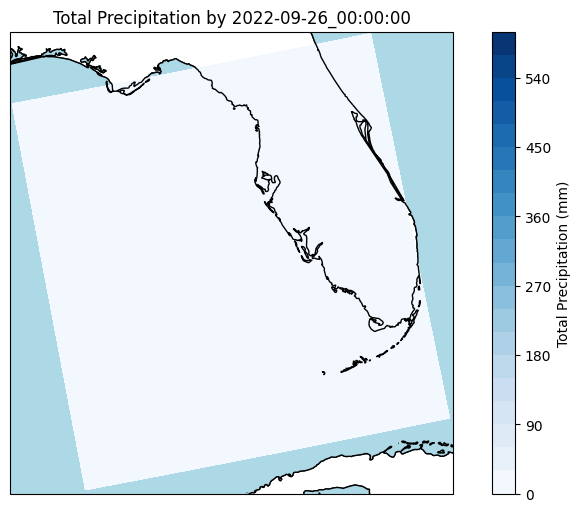

In [58]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation

# Open the NetCDF file
dataset = nc.Dataset(data, 'r')

# Read precipitation and coordinates
rainnc = dataset.variables['RAINNC'][:]
rainc = dataset.variables['RAINC'][:]
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

# Compute cumulative precipitation at each time step
total_precip = rainnc + rainc

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Initial contour
contour = ax.contourf(xlong, xlat, total_precip[0], transform=ccrs.PlateCarree(),
                      cmap='Blues', levels=np.linspace(0, 600, 21))
plt.colorbar(contour, label='Total Precipitation (mm)')
plt.title('')

# Animation update function
def update(frame):
    ax.clear()
    ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    contour = ax.contourf(xlong, xlat, total_precip[frame], transform=ccrs.PlateCarree(),
                          cmap='Blues', levels=np.linspace(0, 600, 21))
    ax.set_title(f'Total Precipitation by {times_str[frame]}')
    return contour,

# Create animation
ani = FuncAnimation(fig, update, frames=range(len(times_str)), blit=False, interval=200)

# Save or display the animation
ani.save('precipitation_animation.gif', writer='pillow')  # Requires pillow
plt.show()

# Close the file
dataset.close()

Number of timesteps: 73
First timestamp: 2022-09-26_00:00:00
Last timestamp: 2022-09-29_00:00:00


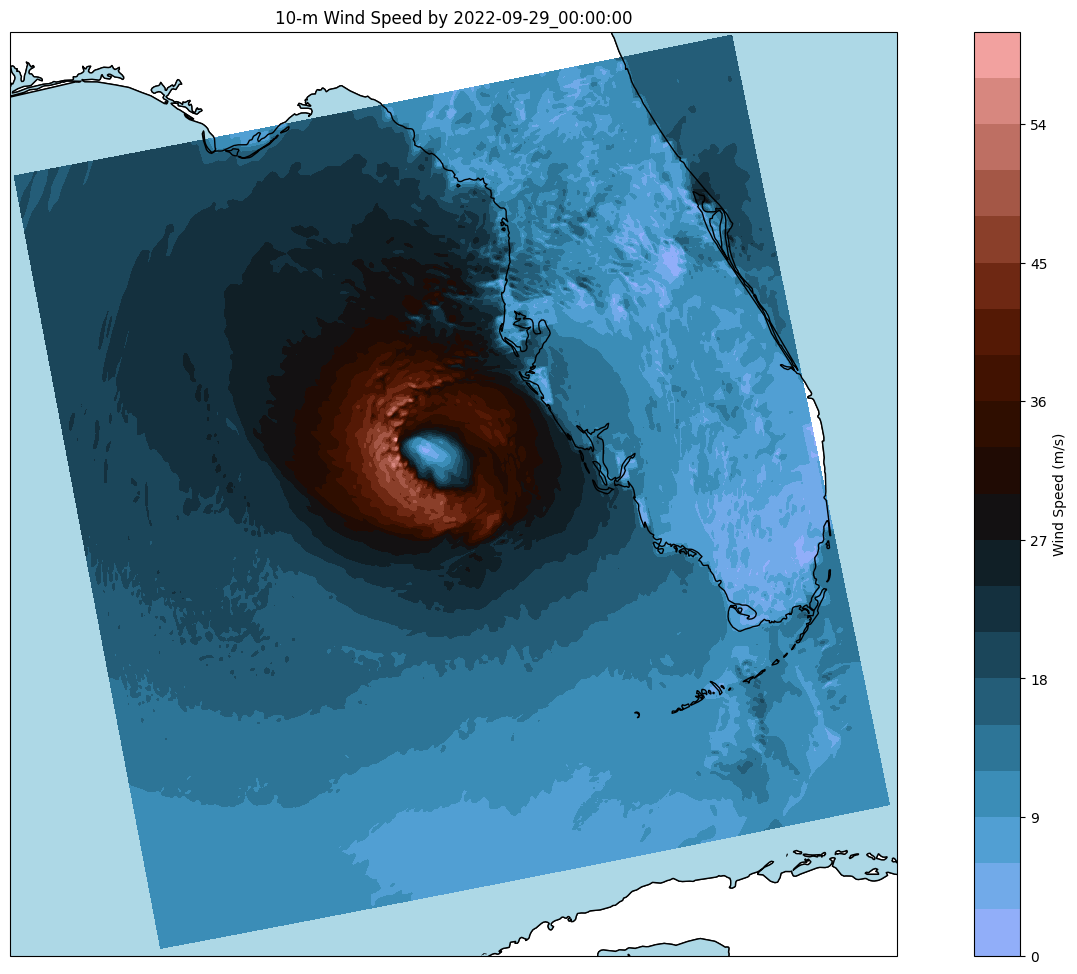

In [59]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

dataset = nc.Dataset(data, 'r')

u10 = dataset.variables['U10'][-1, :, :]  # 10-m u-wind at last time step
v10 = dataset.variables['V10'][-1, :, :]  # 10-m v-wind at last time step
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

# Check number of timesteps
num_timesteps = len(times)
print(f"Number of timesteps: {num_timesteps}")
print(f"First timestamp: {times_str[0]}")
print(f"Last timestamp: {times_str[-1]}")

# Calculate wind speed
wind_speed = np.sqrt(u10**2 + v10**2)

fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, wind_speed, transform=ccrs.PlateCarree(),
                      cmap='berlin', levels=np.linspace(0, 60, 21))  # m/s
plt.colorbar(contour, label='Wind Speed (m/s)')
plt.title(f'10-m Wind Speed by {times_str[-1]}')
plt.show()

dataset.close()

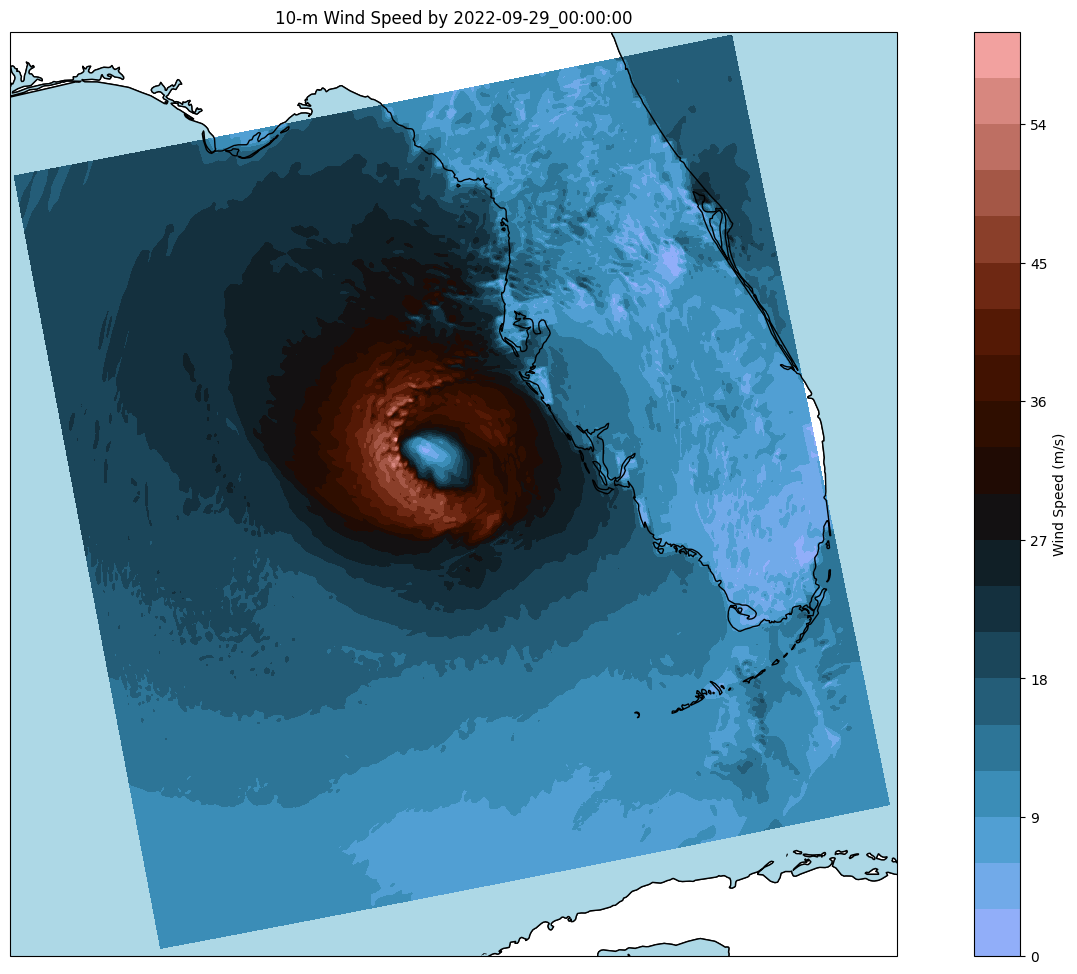

In [ ]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

dataset = nc.Dataset(data, 'r')

u10 = dataset.variables['U10'][-1, :, :]  # 10-m u-wind at last time step
v10 = dataset.variables['V10'][-1, :, :]  # 10-m v-wind at last time step
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

# Calculate wind speed
wind_speed = np.sqrt(u10**2 + v10**2)

fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, wind_speed, transform=ccrs.PlateCarree(),
                      cmap='berlin', levels=np.linspace(0, 60, 21))  # m/s
plt.colorbar(contour, label='Wind Speed (m/s)')
plt.title(f'10-m Wind Speed by {times_str[-1]}')
plt.show()

dataset.close()

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

dataset = nc.Dataset(data, 'r')

u10 = dataset.variables['U10'][-2, :, :]  # 10-m u-wind at last time step
v10 = dataset.variables['V10'][-2, :, :]  # 10-m v-wind at last time step
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

# Calculate wind speed
wind_speed = np.sqrt(u10**2 + v10**2)

fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, wind_speed, transform=ccrs.PlateCarree(),
                      cmap='berlin', levels=np.linspace(0, 60, 21))  # m/s
plt.colorbar(contour, label='Wind Speed (m/s)')
plt.title(f'Ian (10-m Wind Speed) by {times_str[-2]}')
plt.show()

dataset.close()

NameError: name 'data' is not defined

In [62]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

dataset = nc.Dataset(data, 'r')

t = dataset.variables['T'][-1, :, :, :]  # Temperature at last time step
ph = dataset.variables['PH'][-1, :, :, :] + dataset.variables['PHB'][-1, :, :, :]  # Geopotential height
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
z = ph / 9.81  # Convert geopotential to height (m)

# Select a longitude slice (e.g., 84°W)
lon_idx = np.argmin(np.abs(xlong[0, :] + 84))
cross_section = t[:, :, lon_idx]
height = z[:, :, lon_idx]

# Average over latitude for simplicity
cross_section_mean = np.mean(cross_section, axis=1)
height_mean = np.mean(height, axis=1)

plt.figure(figsize=(10, 6))
plt.contourf(range(len(xlat[:, 0])), height_mean[:, 0], cross_section_mean, cmap='RdYlBu_r', levels=21)
plt.colorbar(label='Temperature (K)')
plt.title(f'Vertical Cross-Section of Temperature at 84°W by {times_str[-1]}')
plt.xlabel('Latitude Index')
plt.ylabel('Height (m)')
plt.show()

dataset.close()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1000x600 with 0 Axes>

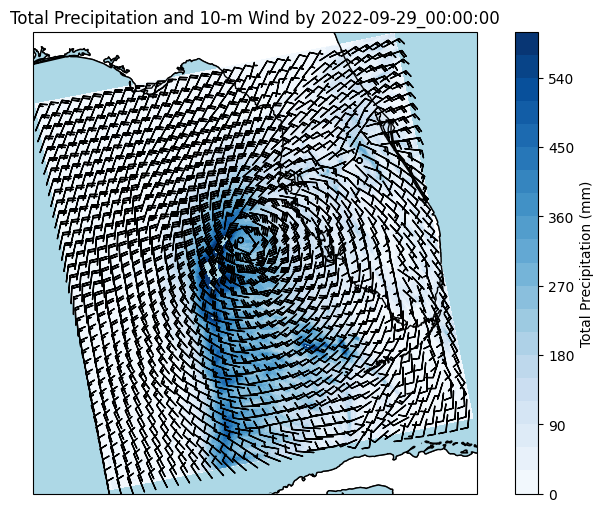

In [63]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

dataset = nc.Dataset(data, 'r')

rainnc = dataset.variables['RAINNC'][-1, :, :]
rainc = dataset.variables['RAINC'][-1, :, :]
u10 = dataset.variables['U10'][-1, :, :]
v10 = dataset.variables['V10'][-1, :, :]
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(time.astype(str)) for time in times]

total_precip = rainnc + rainc

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot precipitation
contour = ax.contourf(xlong, xlat, total_precip, transform=ccrs.PlateCarree(),
                      cmap='Blues', levels=np.linspace(0, 600, 21))
plt.colorbar(contour, label='Total Precipitation (mm)')

# Add wind barbs (every 20 points for clarity)
step = 20
ax.barbs(xlong[::step, ::step], xlat[::step, ::step], u10[::step, ::step], v10[::step, ::step],
         transform=ccrs.PlateCarree(), length=5, pivot='middle')

plt.title(f'Total Precipitation and 10-m Wind by {times_str[-1]}')
plt.show()

dataset.close()

In [64]:
import netCDF4 as nc
import numpy as np

dataset = nc.Dataset(data, 'r')

rainnc = dataset.variables['RAINNC'][-1, :, :]
rainc = dataset.variables['RAINC'][-1, :, :]
landmask = dataset.variables['LANDMASK'][-1, :, :]

total_precip = rainnc + rainc
max_precip = np.max(total_precip)
mean_precip_land = np.mean(total_precip[landmask == 1])
mean_precip_ocean = np.mean(total_precip[landmask == 0])

print(f"Maximum Precipitation: {max_precip:.2f} mm")
print(f"Mean Precipitation over Land: {mean_precip_land:.2f} mm")
print(f"Mean Precipitation over Ocean: {mean_precip_ocean:.2f} mm")

dataset.close()

Maximum Precipitation: 787.26 mm
Mean Precipitation over Land: 61.14 mm
Mean Precipitation over Ocean: 99.66 mm
